In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
import matplotlib.pyplot as plt

2023-09-04 10:12:31.131365: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-04 10:12:31.156654: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 10:12:31.563789: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('GOOGL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [3]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [5]:
df = df.loc[:,["High"]].values
train = df[:len(df)-50] 
test = df[len(train):] 

In [6]:
train = train.reshape(train.shape[0],1)

Text(0.5, 1.0, 'High prices for the data')

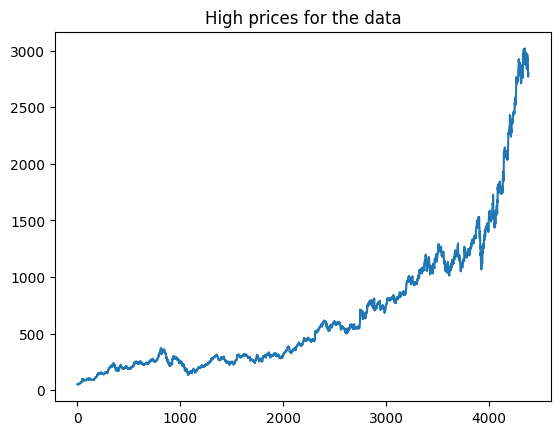

In [7]:
plt.plot(train);
plt.title("High prices for the data")

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
train_scaled = scaler.fit_transform(train)

In [9]:
import numpy as np
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) 

In [10]:
from keras.layers import SimpleRNN
from keras.layers import Dropout

regressor = Sequential()

regressor.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 

regressor.add(SimpleRNN(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
 
regressor.add(SimpleRNN(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100


2023-09-04 10:12:34.360925: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-04 10:12:34.376771: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-04 10:12:34.376915: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

136/136 [==============================] - 5s 24ms/step - loss: 0.0943
Epoch 2/100
136/136 [==============================] - 3s 24ms/step - loss: 0.0499
Epoch 3/100
136/136 [==============================] - 3s 24ms/step - loss: 0.0467
Epoch 4/100
136/136 [==============================] - 3s 24ms/step - loss: 0.0454
Epoch 5/100
136/136 [==============================] - 3s 24ms/step - loss: 0.0448
Epoch 6/100
136/136 [==============================] - 3s 24ms/step - loss: 0.0444
Epoch 7/100
136/136 [==============================] - 3s 24ms/step - loss: 0.0442
Epoch 8/100
136/136 [==============================] - 3s 24ms/step - loss: 0.0440
Epoch 9/100
136/136 [==============================] - 3s 24ms/step - loss: 0.0440
Epoch 10/100
136/136 [==============================] - 3s 24ms/step - loss: 0.0439
Epoch 11/100
136/136 [==============================] - 3s 24ms/step - loss: 0.0439
Epoch 12/100
136/136 [==============================] - 3s 25ms/step - loss: 0.0438
Epoch 13/100
